# How did Mikel Arteta's team evolve since he arrived at Arsenal? / Was This Mikel Arteta's Best Premier League Season with Arsenal So Far?

Whether you are an Arsenal fan or just a football fanatic, I think we can all agree that Arsenal's performance this season was unexpected. Many might argue that they fumbled the bag in the final matches, but even amidst some disappointment, many were still excited to experience such a season. This is the closest they've been to the title since Mikel Arteta's arrival, and faith in the process is growing. In this study, we will determine if this was Mikel Arteta's best season in the Premier League since his appointment. I took the following datasets from kaggle, you can go check them out with the links bellow: 



### Import the necessary libraries & load the datasets 

In [1]:
#Import the necessary libraries that we will use to analyze the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
#Loading & reading data from the csv files usinf the pandas library

#premier league stats for the season 2022-2023. This dataset contains the stats of all the matches during the season 2022-2023.
file_path_premier_league_22_23 = "C:\\Users\\Sascha\\OneDrive\\Desktop\\Projects\\blog\\data\\premier-league_22_23.csv"
df_premier_league = pd.read_csv(file_path_premier_league_22_23)

#This dataset includes results of Arsenal FC matches starting from 2017/18 season up to 28.02.2022
file_path_arsenal_matches = "C:\\Users\\Sascha\\OneDrive\\Desktop\\Projects\\blog\\data\\matches.csv"
df_arsenal_matches = pd.read_csv(file_path_arsenal_matches)

### Data pre-processing

In [3]:
#First visualizations of our dataframes

#Premier League dataset
pd.set_option('max_columns',40)
df_premier_league.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,home_pass,away_pass,home_chances,away_chances,home_corners,away_corners,home_offside,away_offside,home_tackles,away_tackles,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,14,6,8,0,4,4,2,2,89.0,88.0,3,0,8,4,1,0,82.4,44.4,47.8,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,12,8,5,4,5,3,2,1,75.3,83.6,4,3,4,3,0,6,42.9,15.4,52.2,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,11,17,4,3,4,6,3,8,79.3,89.8,2,1,3,4,3,0,64.7,35.7,50.0,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,22,13,5,4,9,5,8,4,88.9,83.3,2,2,10,3,2,1,42.9,42.9,54.5,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,15,7,3,4,8,2,4,1,85.7,69.9,1,0,5,4,2,2,40.0,52.6,58.3,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [4]:
#Arsenal matches dataset
df_arsenal_matches.head()

,Season,Tour,Date,Time,Opponent,HoAw,ArsenalScore,OpponentScore,Stadium,Attendance,Coach,Referee
0,2017/18,1,2017-08-11,20:45:00,Leicester,home,4,3,Emirates Stadium,59387,Arsène Wenger,Mike Dean
1,2017/18,2,2017-08-19,18:30:00,Stoke City,away,0,1,bet365 Stadium,29459,Arsène Wenger,Andre Marriner
2,2017/18,3,2017-08-27,17:00:00,Liverpool,away,0,4,Anfield,53206,Arsène Wenger,Craig Pawson
3,2017/18,4,2017-09-09,16:00:00,Bournemouth,home,3,0,Emirates Stadium,59262,Arsène Wenger,Anthony Taylor
4,2017/18,5,2017-09-17,14:30:00,Chelsea,away,0,0,Stamford Bridge,41478,Arsène Wenger,Michael Oliver


In [5]:
#Shape of datasets
print("Premier league dataframe has: ",df_premier_league.shape[0], " lines and ",df_premier_league.shape[1], " columns.")
print("Arsenal matches dataframe has: ",df_arsenal_matches.shape[0]," lines and ",df_arsenal_matches.shape[1]," columns.")

Premier league dataframe has:  380  lines and  39  columns.
Arsenal matches dataframe has:  214  lines and  12  columns.


In [6]:
#Let's look at the different columns we have in our dataframes, for my analysis, some columns won't be necessary i.e links, clock, ...
df_premier_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              380 non-null    object 
 1   clock             380 non-null    object 
 2   stadium           380 non-null    object 
 3   attendance        380 non-null    object 
 4   Home Team         380 non-null    object 
 5   Goals Home        380 non-null    int64  
 6   Away Team         380 non-null    object 
 7   Away Goals        380 non-null    int64  
 8   home_possessions  380 non-null    float64
 9   away_possessions  380 non-null    float64
 10  home_shots        380 non-null    int64  
 11  away_shots        380 non-null    int64  
 12  home_on           380 non-null    int64  
 13  away_on           380 non-null    int64  
 14  home_off          380 non-null    int64  
 15  away_off          380 non-null    int64  
 16  home_blocked      380 non-null    int64  
 1

In [7]:
#Drop the columns that we will not use for our dataset
data_premier_league = df_premier_league.drop(columns=['clock','links'], axis=1)

In [8]:
df_arsenal_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Season         214 non-null    object
 1   Tour           214 non-null    int64 
 2   Date           214 non-null    object
 3   Time           214 non-null    object
 4   Opponent       214 non-null    object
 5   HoAw           214 non-null    object
 6   ArsenalScore   214 non-null    int64 
 7   OpponentScore  214 non-null    int64 
 8   Stadium        214 non-null    object
 9   Attendance     214 non-null    int64 
 10  Coach          214 non-null    object
 11  Referee        214 non-null    object
dtypes: int64(4), object(8)
memory usage: 20.2+ KB


In [9]:
data_arsenal_matches = df_arsenal_matches.drop(columns=['Time'])

In [10]:
#We will now display the data types of each column using the function dtypes, for some of the columns, we might need to change their data types
data_premier_league.dtypes

date                 object
stadium              object
attendance           object
Home Team            object
Goals Home            int64
Away Team            object
Away Goals            int64
home_possessions    float64
away_possessions    float64
home_shots            int64
away_shots            int64
home_on               int64
away_on               int64
home_off              int64
away_off              int64
home_blocked          int64
away_blocked          int64
home_pass           float64
away_pass           float64
home_chances          int64
away_chances          int64
home_corners          int64
away_corners          int64
home_offside          int64
away_offside          int64
home_tackles        float64
away_tackles        float64
home_duels          float64
away_duels          float64
home_saves            int64
away_saves            int64
home_fouls            int64
away_fouls            int64
home_yellow           int64
away_yellow           int64
home_red            

In [11]:
#For a later analysis, it might be better to set the attendance to as an integer and the date as a datetime object
data_premier_league['attendance'] = data_premier_league['attendance'].replace(',','',regex=True)
#Before converting to integer, we can observe that there are Nan values, let us get a closer look
data_premier_league['attendance'].value_counts()

Nan      5
17051    3
62470    2
17122    2
25198    2
        ..
17107    1
32094    1
60012    1
36582    1
39271    1
Name: attendance, Length: 367, dtype: int64

In [12]:
#We can search the missing values on the internet and replace the cells with the values we find
data_premier_league.loc[data_premier_league['attendance'] == 'Nan', ['stadium','attendance', 'Home Team', 'Away Team','Goals Home','Away Goals']]

,stadium,attendance,Home Team,Away Team,Goals Home,Away Goals
72,Nan,Nan,Liverpool,Nottingham Forest,3,2
210,Nan,Nan,Everton,Brighton and Hove Albion,1,4
323,Nan,Nan,Brentford,Leeds United,5,2
338,Nan,Nan,Southampton,Chelsea,2,1
350,Nan,Nan,Manchester United,Liverpool,2,1


In [13]:
#Liverpool vs Nottingham Forest
data_premier_league.loc[72,['attendance']] = '53325'
data_premier_league.loc[72,['stadium']] = 'Anfield'
#Everton vs Brighton and Hove Albion
data_premier_league.loc[210,['attendance']] = '39103'
data_premier_league.loc[210,['stadium']] = 'Goodison Park'
#Brentford vs Leeds United
data_premier_league.loc[323,['attendance']] = '17092'
data_premier_league.loc[323,['stadium']] = 'Gtech Community Stadium'
#Southampton vs Chelsea
data_premier_league.loc[338,['attendance']] = '31542'
data_premier_league.loc[338,['stadium']] = 'St. Mary\'s Stadium'
#Manchester United vs Liverpool
data_premier_league.loc[350,['attendance']] = '73594'
data_premier_league.loc[350,['stadium']] = 'Old Trafford'

#Other option: we could have filled the missing cells with the average attendance of each team 

In [14]:
#Now that we have the correct values for each cell, we can convert the string to int32 for the attendance 
data_premier_league['attendance'] = data_premier_league['attendance'].astype('int32')
data_premier_league['date'] = pd.to_datetime(data_premier_league['date'])

In [15]:
data_arsenal_matches.dtypes

Season           object
Tour              int64
Date             object
Opponent         object
HoAw             object
ArsenalScore      int64
OpponentScore     int64
Stadium          object
Attendance        int64
Coach            object
Referee          object
dtype: object

In [16]:
#Let us change the date to datetime object for the arsenal_matches dataset
data_arsenal_matches['Date'] = pd.to_datetime(data_arsenal_matches['Date'])

### Analysis: 

#### Attendance analysis

The reason I wanted to have the attendance as an integer type was to observe the evolution throughout the different seasons. I believe that this could give us a little clarity in understanding the fans trust in Mikel Arteta over the past 4 years as manager. We will only focus on the home fans attendance and use graphs to compare the different seasons.

In [17]:
#Let us only gather the attendance at the Emirates Stadium for the season 22/23
data_attendance_arsenal = data_premier_league[data_premier_league['stadium']=='Emirates Stadium']
#Sorting the dates
data_attendance_arsenal = data_attendance_arsenal.sort_values('date')

#Functions to calculate the number of points for a home team and away team
def points_home(data):
    points = []
    goal_difference = list(data['Goals Home'] - data['Away Goals'])

    for difference in goal_difference:
        if difference > 0:
            points.append(3)
        elif difference == 0:
            points.append(1)
        else:
            points.append(0)
    
    return points

def points_away(data):
    points = []
    goal_difference = list(data['Away Goals'] - data['Goals Home'])

    for difference in goal_difference:
        if difference > 0:
            points.append(3)
        elif difference == 0:
            points.append(1)
        else:
            points.append(0)
    
    return points

#Adding a column points to the dataframe
data_attendance_arsenal['Points'] = points_home(data_attendance_arsenal)

data_attendance_arsenal[['date','attendance','Goals Home','Away Goals','Away Team','Points']]

,date,attendance,Goals Home,Away Goals,Away Team,Points
364,2022-08-13,60033,4,2,Leicester City,3
349,2022-08-27,60164,2,1,Fulham,3
331,2022-08-31,60012,2,1,Aston Villa,3
306,2022-10-01,60278,3,1,Tottenham Hotspur,3
296,2022-10-09,59968,3,2,Liverpool,3
254,2022-10-30,60263,5,0,Nottingham Forest,3
233,2022-12-26,60125,3,1,West Ham United,3
209,2023-01-03,60319,0,0,Newcastle United,1
184,2023-01-22,60325,3,2,Manchester United,3
164,2023-02-11,60254,1,1,Brentford,1


Before we look at the evolution during the 22/23 season, let me give you some numbers. The maximum capacity at the Emirates Stadium is of 60,704 making it the 5th largest stadium in England and Arsenal is included in the teams of the Premier League with the highest average ticket price with the likes of Tottenham or West Ham during the 2022-2023 season. Now let's look at some graphs.

In [18]:
#get the file paths for each file in the folder

import os

def getFilePath(folder_path):
    image_files = []

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image_files.append(image_path)

    return image_files

In [ ]:
from PIL import Image
import os

# Folder paths
input_folder = './blog_one_folders/logo_folder'  # Path to the folder containing input images
output_folder = './blog_one_folders/logo_folder_resized'  # Path to the folder where resized images will be saved

# Maximum size for resized images
max_size = (25, 25) 

i = 1
# Iterate over each file in the input folder
for file_name in os.listdir(input_folder):
    # Open the image file
    image_path = os.path.join(input_folder, file_name)
    image = Image.open(image_path)

    # Resize the image while preserving aspect ratio
    image.thumbnail(max_size)

    # Save the resized image to the output folder
    output_path = os.path.join(output_folder, file_name)
    image.save(output_path)
    i += 1

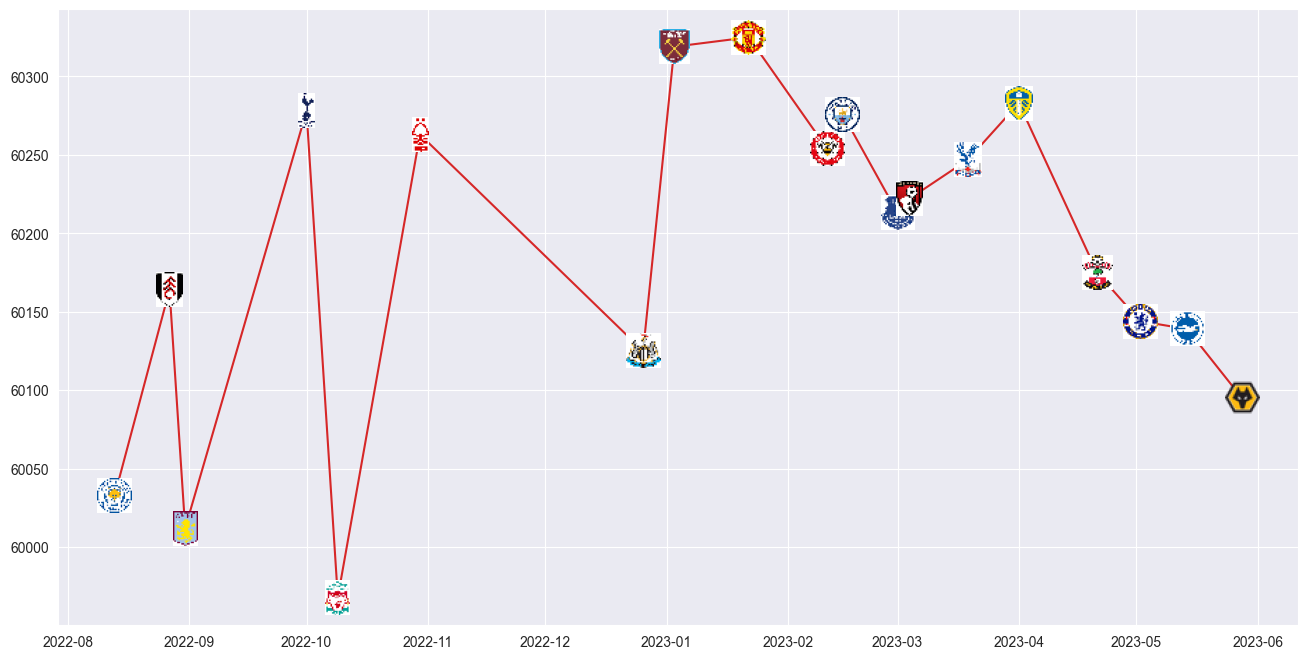

In [19]:
#Graph one: Arsenal's attendance evolution during the 22-23 premier league season 
import os

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = getFilePath('./blog_one_folders/logo_folder_resized')

sorted_paths = sorted(paths, key=lambda x: int(os.path.splitext(os.path.basename(x))[0].split("_")[-1]))

attendance = data_attendance_arsenal['attendance']
date = data_attendance_arsenal['date']

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(date, attendance, linestyle='-', color='tab:red')

for x0, y0, path in zip(date, attendance,sorted_paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

In [20]:
data_attendance_arsenal['attendance'].describe()

count       19.000000
mean     60186.052632
std        104.634535
min      59968.000000
25%      60132.000000
50%      60213.000000
75%      60269.500000
max      60325.000000
Name: attendance, dtype: float64

C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\476972147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arsenal_home['Points'] = points_home(data_arsenal_home)
C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\476972147.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arsenal_away['Points'] = points_away(data_arsenal_away)


Text(0.5, 1.0, 'Accumulated Points for Arsenal Matches')

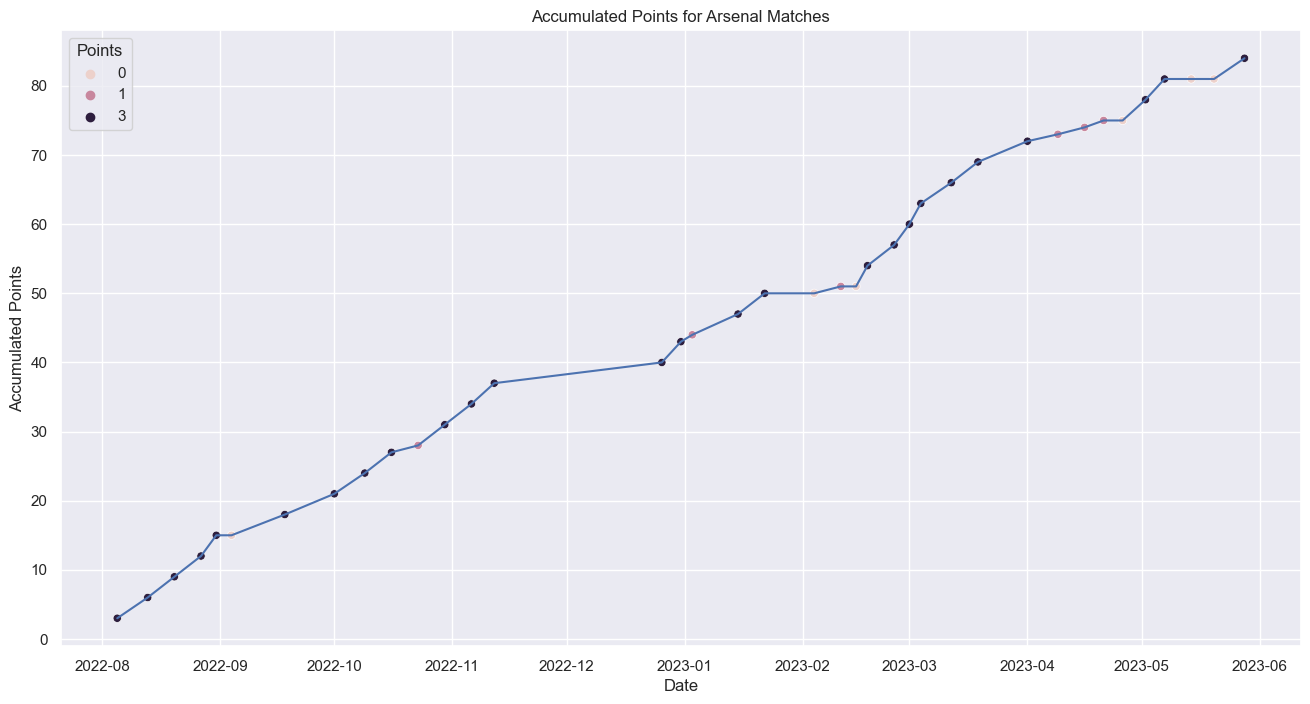

In [21]:
#Graph 2: number of points collected throughout the season 
data_arsenal_home = data_premier_league[data_premier_league['Home Team']=='Arsenal']
data_arsenal_home['Points'] = points_home(data_arsenal_home)

data_arsenal_away = data_premier_league[data_premier_league['Away Team']=='Arsenal']
data_arsenal_away['Points'] = points_away(data_arsenal_away)

frames = [data_arsenal_home,data_arsenal_away]
data_arsenal_matches_22_23 = pd.concat(frames)
data_arsenal_matches_22_23 = data_arsenal_matches_22_23.sort_values('date')


data_arsenal_matches_22_23['Accumulated Points'] = data_arsenal_matches_22_23['Points'].cumsum()

# Set up the graph
sns.set(style='darkgrid')
plt.figure(figsize=(16, 8))

# Create the graph using seaborn
sns.lineplot(data=data_arsenal_matches_22_23, x='date', y='Accumulated Points')
sns.scatterplot(data=data_arsenal_matches_22_23, x='date', y='Accumulated Points', color='red', hue='Points')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Accumulated Points')
plt.title('Accumulated Points for Arsenal Matches')

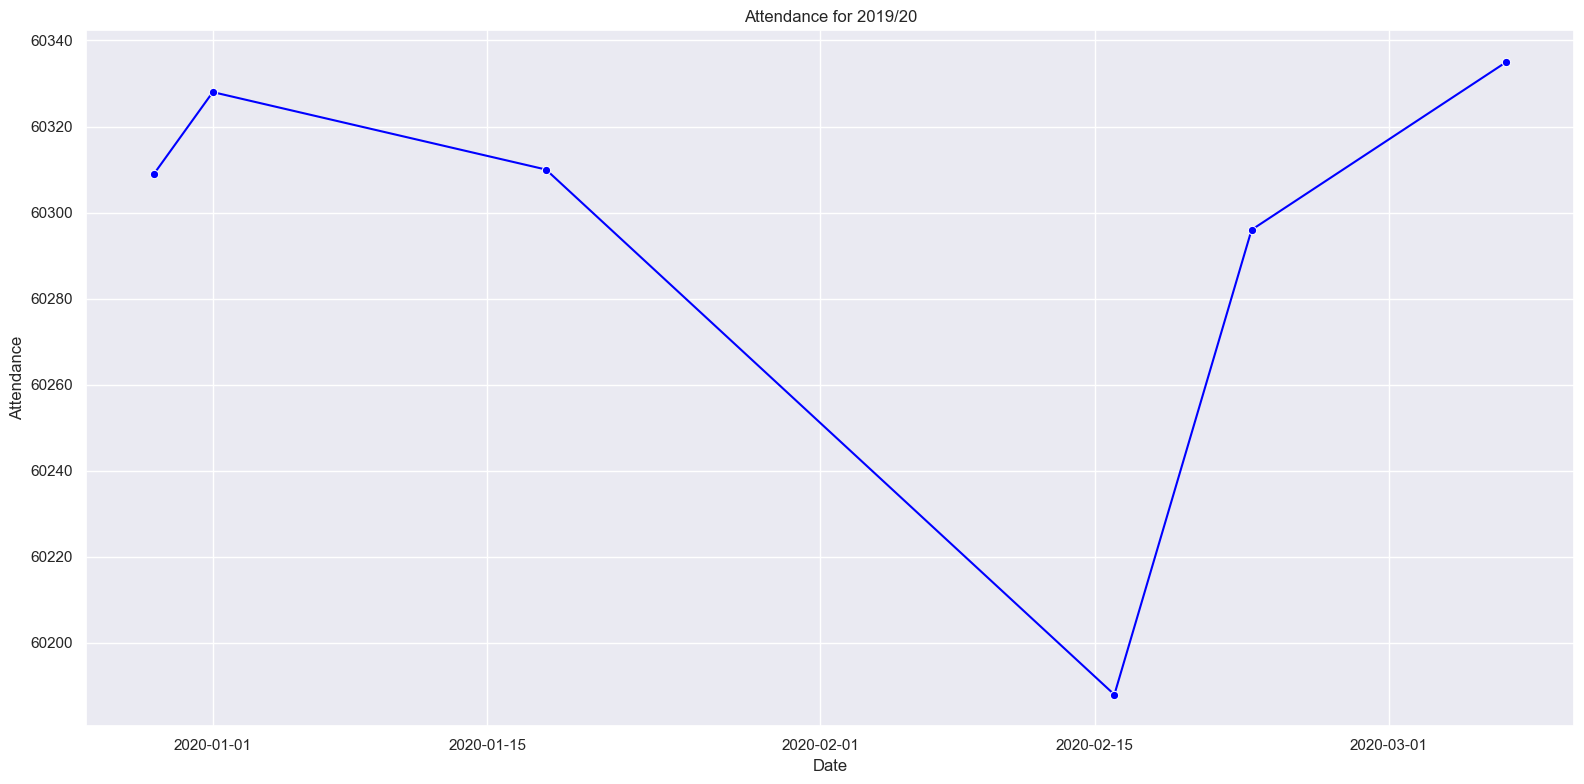

In [22]:
#Graph 3: Emirates stadium attendance since Mikel Arteta’s arrival

#Get Arsenal attendance since Mikel Arteta's Arrival
data_arsenal_attendance_mikel_arteta = data_arsenal_matches[(data_arsenal_matches['Stadium'] == 'Emirates Stadium') & (data_arsenal_matches['Coach'] == 'Mikel Arteta')]
#Arsenal attendance for the 19/20 season -> Arteta came in the middle of the season (remove the 0s)
data_arsenal_attendance_19_20 = data_arsenal_attendance_mikel_arteta[(data_arsenal_attendance_mikel_arteta['Season'] == '2019/20') & (data_arsenal_attendance_mikel_arteta['Attendance'] != 0)]
#Arsenal attendance for the 20/21 season -> Covid
data_arsenal_attendance_20_21 = data_arsenal_attendance_mikel_arteta[(data_arsenal_attendance_mikel_arteta['Season'] == '2020/21') & (data_arsenal_attendance_mikel_arteta['Attendance'] != 0)]
#Arsenal attendance for the 21/22 season
data_arsenal_attendance_21_22 = data_arsenal_attendance_mikel_arteta[data_arsenal_attendance_mikel_arteta['Season'] == '2021/22']

# Set up the figure with three subplots
fig, ax = plt.subplots(figsize=(16, 8))

# Graph 1
sns.lineplot(data=data_arsenal_attendance_19_20, x='Date', y='Attendance', color='blue', marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Attendance')
ax.set_title('Attendance for 2019/20')

# Adjust the layout and spacing
plt.tight_layout()

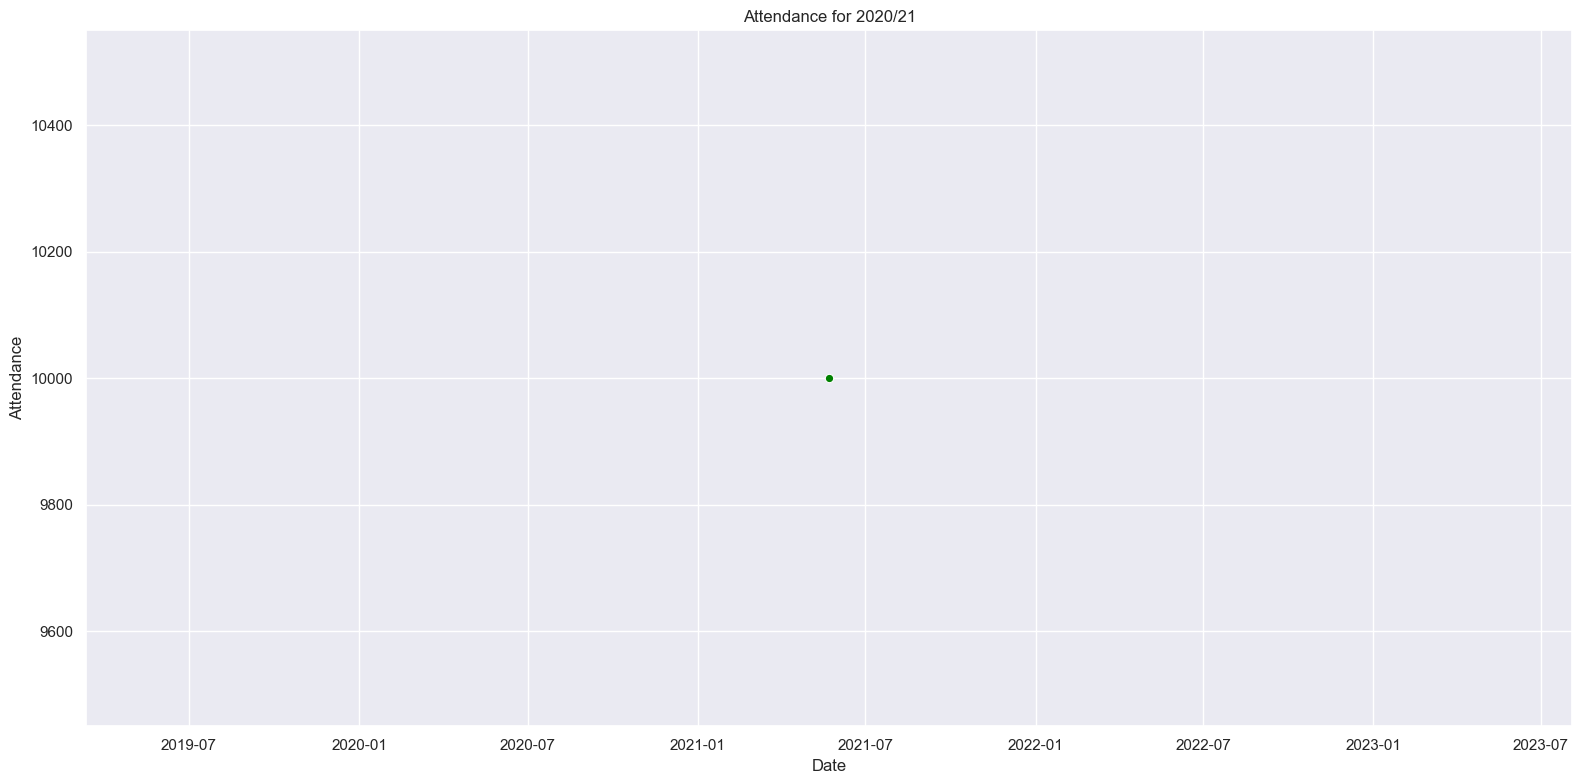

In [23]:
# Set up the figure with three subplots
fig, ax = plt.subplots(figsize=(16, 8))

# Graph 2
sns.lineplot(data=data_arsenal_attendance_20_21, x='Date', y='Attendance',marker='o', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Attendance')
ax.set_title('Attendance for 2020/21')

# Adjust the layout and spacing
plt.tight_layout()

Text(0.5, 1.0, 'Attendance for 2021/22')

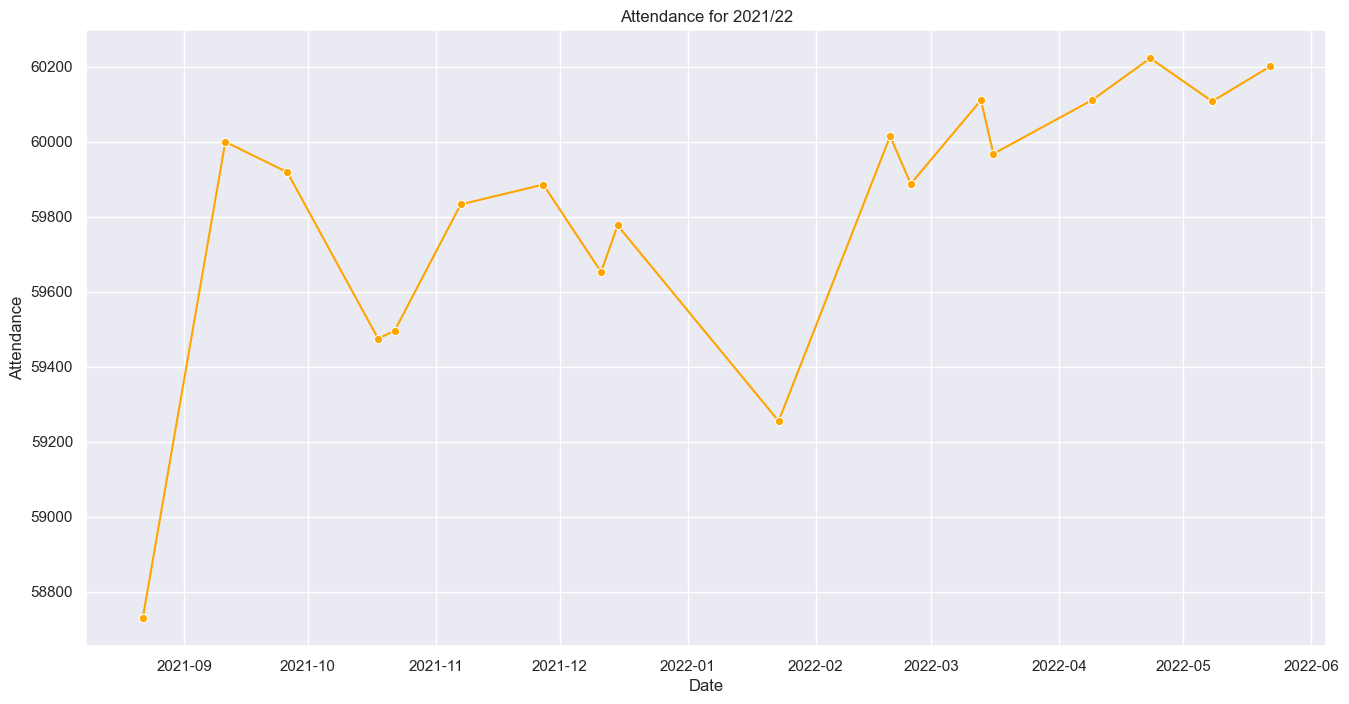

In [24]:
# Set up the figure with three subplots
fig, ax = plt.subplots(figsize=(16, 8))

# Graph 3
sns.lineplot(data=data_arsenal_attendance_21_22, x='Date', y='Attendance',marker='o', color='orange')
ax.set_xlabel('Date')
ax.set_ylabel('Attendance')
ax.set_title('Attendance for 2021/22')

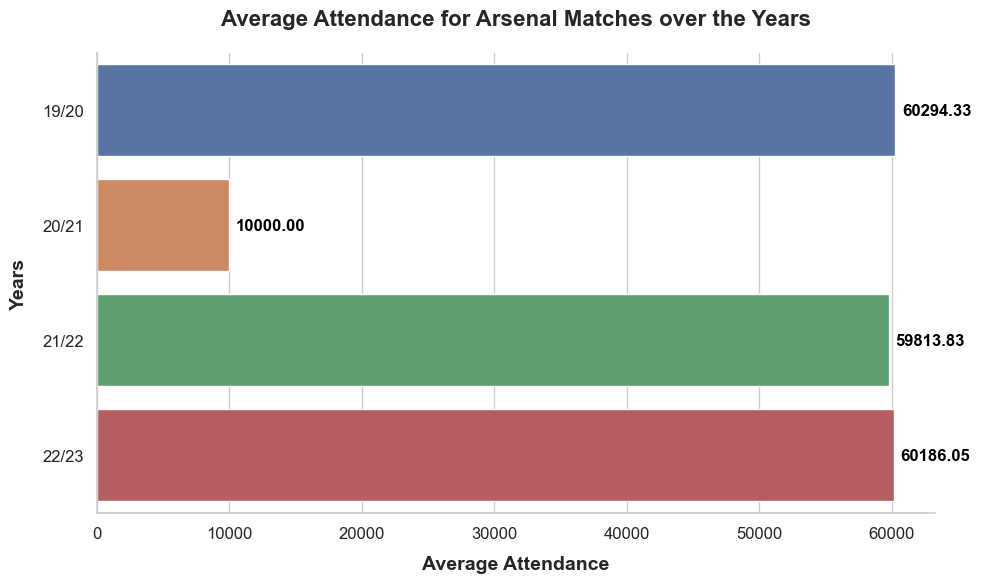

In [25]:
#Graph 4: Average attendance throughout the different years -> Barplot
# Data
average_attendance = [data_arsenal_attendance_19_20['Attendance'].mean(), data_arsenal_attendance_20_21['Attendance'].mean(), data_arsenal_attendance_21_22['Attendance'].mean(), data_attendance_arsenal['attendance'].mean()]
years = ['19/20', '20/21', '21/22', '22/23']

# Set up the graph
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot using seaborn
sns.barplot(x=average_attendance, y=years, ax=ax)

# Add values to the bars
for i, v in enumerate(average_attendance):
    ax.text(v + 500, i, f'{v:.2f}', va='center', fontweight='bold', color='black')

# Set labels and title
plt.xlabel('Average Attendance', labelpad=10, fontsize=14, fontweight='bold')
plt.ylabel('Years', labelpad=10, fontsize=14, fontweight='bold')
plt.title('Average Attendance for Arsenal Matches over the Years', pad=20, fontsize=16, fontweight='bold')

# Remove the top and right spines
sns.despine()

# Customize the tick labels
ax.tick_params(axis='both', labelsize=12)

# Adjust the plot layout
plt.tight_layout()

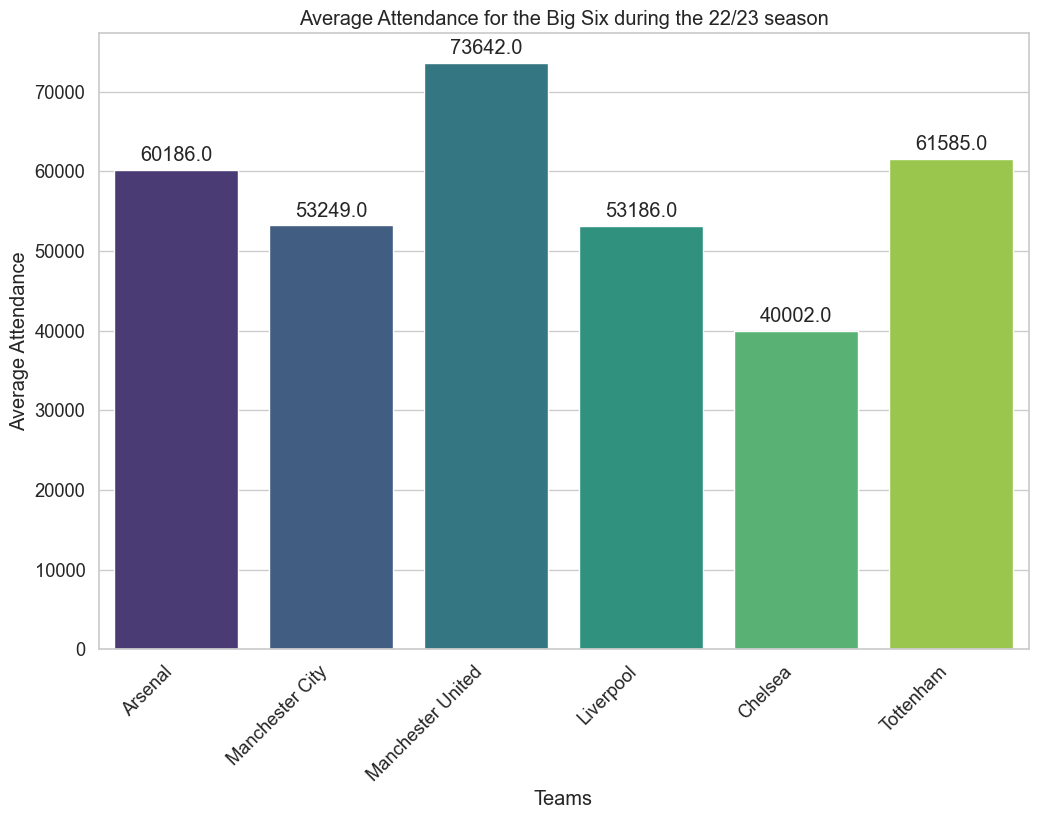

In [26]:
# Emirates stadium attendance compared to the big six
data_attendance_man_city = data_premier_league[data_premier_league['stadium']=='Etihad Stadium']

data_attendance_man_united = data_premier_league[data_premier_league['stadium']=='Old Trafford']

data_attendance_liverpool = data_premier_league[data_premier_league['stadium']=='Anfield']

data_attendance_chelsea = data_premier_league[data_premier_league['stadium']=='Stamford Bridge']

data_attendance_tottenham = data_premier_league[data_premier_league['stadium']=='Tottenham Hotspur Stadium']


average_attendance_big_six = [round(data_attendance_arsenal['attendance'].mean()), 
                              round(data_attendance_man_city['attendance'].mean()), 
                              round(data_attendance_man_united['attendance'].mean()), 
                              round(data_attendance_liverpool['attendance'].mean()), 
                              round(data_attendance_chelsea['attendance'].mean()),
                              round(data_attendance_tottenham['attendance'].mean())]
teams = ['Arsenal', 'Manchester City', 'Manchester United', 'Liverpool', 'Chelsea', 'Tottenham']

data_average_attendance_big_six = pd.DataFrame({'Teams':teams, 'Average Attendance':average_attendance_big_six})

# Set up the graph
sns.set(style='whitegrid', font_scale=1.2)
plt.figure(figsize=(12, 8))

# Create the graph using seaborn
ax = sns.barplot(data=data_average_attendance_big_six, x='Teams', y='Average Attendance', palette='viridis')

# Customize the plot
ax.set(xlabel='Teams', ylabel='Average Attendance', title='Average Attendance for the Big Six during the 22/23 season')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.yaxis.grid(True)

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


#### Has Arteta Turned the Emirates Into a Fortress? (analysis)

Home advantage is crucial in the Premier League title race. Extra support from your own fans can provide that needed "12th man" edge over opponents. In this analysis, we examine if Mikel Arteta has strengthened Arsenal's home stadium since his appointment. 

##### Analysis of the PL 22/23 season:

Dive into the 22/23 Season: Arsenal home form by opponent

In [27]:
pl_abbreviations = ['LEI', 'FUL', 'AVL', 'TOT', 'LIV', 'NFO', 'WHU', 'NEW', 'MUN', 'BRE', 'MCI', 'EVE', 'BOU', 'CRY', 'LEE', 'SOU', 'CHE', 'BRI', 'WOL']

C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\2215878196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arsenal_home_22_23['Points'] = points_home(data_arsenal_home_22_23)
C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\2215878196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arsenal_home_22_23['Accumulated Points'] = data_arsenal_home_22_23['Points'].cumsum()


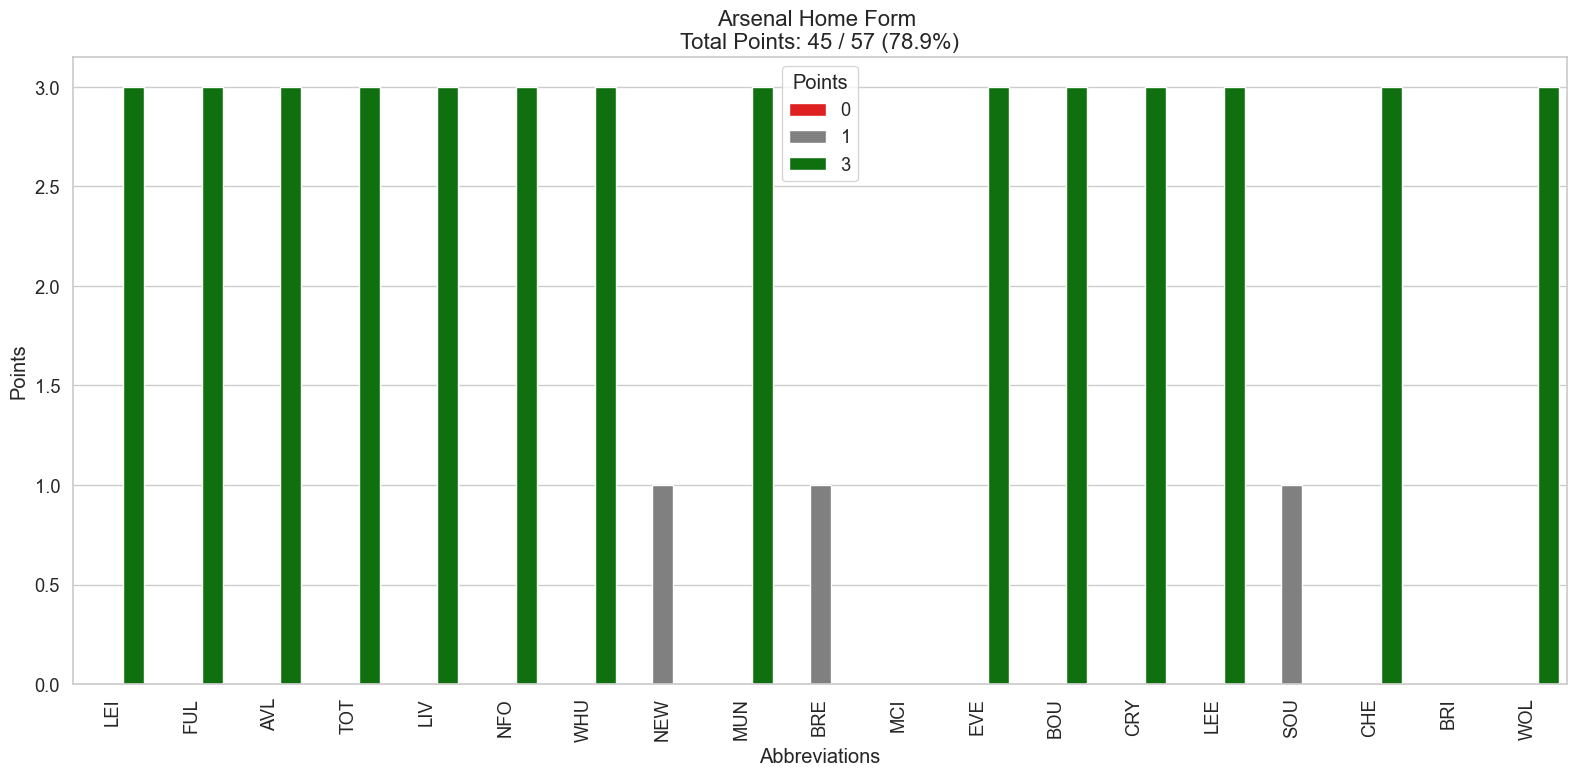

In [28]:
# Add the necessary columns (points per game and cumulated points)
data_arsenal_home_22_23 = data_premier_league[data_premier_league['Home Team']=='Arsenal']
data_arsenal_home_22_23['Points'] = points_home(data_arsenal_home_22_23)
data_arsenal_home_22_23['Accumulated Points'] = data_arsenal_home_22_23['Points'].cumsum()
data_arsenal_home_22_23 = data_arsenal_home_22_23.sort_values('date')
data_arsenal_home_22_23['Abbreviations'] = pl_abbreviations

#Graph 1: Arsenal home form by opponent - Bar graph of points won vs each team with a hue that says if they won, lost or drew 
# (at the end the total number of points collected + under the possible number of points -> percentage)

plt.figure(figsize=(16,8))
# Adjust team name rotation 
sns.set(font_scale=1.2, style="whitegrid")

# Bar plot
g = sns.barplot(data=data_arsenal_home_22_23, 
                x='Abbreviations', 
                y='Points', 
                hue='Points',
                palette=["red","grey","green"])


# Add points total and percentage
total_points = data_arsenal_home_22_23['Points'].sum()
possible_points = len(data_arsenal_home_22_23) * 3
percent = total_points/possible_points * 100

plt.title(f"Arsenal Home Form \nTotal Points: {total_points} / {possible_points} ({percent:.1f}%)", 
          fontsize=16)
plt.xticks(rotation="vertical")

# Tweak spacing and show plot
plt.tight_layout()
plt.show()

#Maybe change to dual axis chart????

Arenal home form compared to the the other teams (points)

AttributeError: 'Wedge' object has no attribute 'get_x'

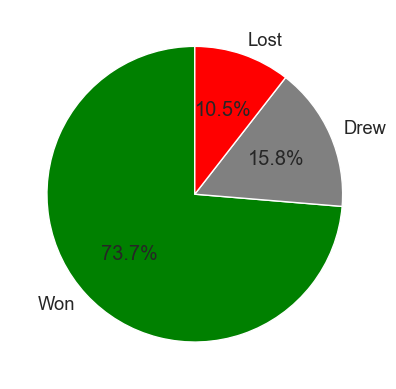

In [29]:
labels = ['Won', 'Drew', 'Lost']
points_count = data_arsenal_home_22_23['Points'].value_counts()

fig, ax = plt.subplots()
pie = ax.pie(points_count, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'gray', 'red'])

# Add count labels on each pie slice
for i, slice in enumerate(pie[0]):
    percentage = slice.get_label()
    count = points_count[i]
    ax.text(slice.get_x(), slice.get_y(), f'{count}\n{percentage}', ha='center', va='center')

# Set the title
ax.set_title('Distribution of Matches')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()

C:\Users\Sascha\AppData\Local\Temp\ipykernel_11928\690360161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Points'] = points_home(data)
C:\Users\Sascha\AppData\Local\Temp\ipykernel_11928\690360161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accumulated Points'] = data['Points'].cumsum()


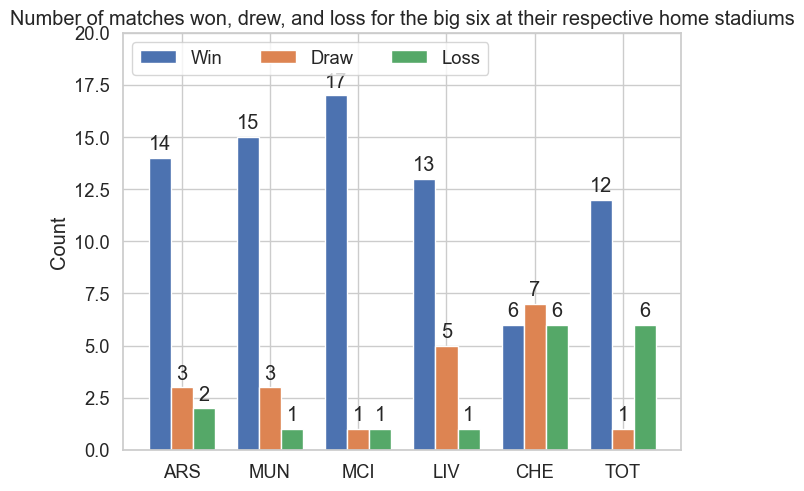

In [ ]:
#Stacked bar chart / Grouped bar chart for each team & number of matches won, drew & lost
def points_22_23(data):
    data['Points'] = points_home(data)
    data['Accumulated Points'] = data['Points'].cumsum()
    data = data.sort_values('date')
    return data

#manchester united
data_manchester_united_home_22_23 = points_22_23(data_premier_league[data_premier_league['Home Team']=='Manchester United'])

#manchester city
data_manchester_city_home_22_23 = points_22_23(data_premier_league[data_premier_league['Home Team']=='Manchester City'])

#liverpool
data_liverpool_home_22_23 = points_22_23(data_premier_league[data_premier_league['Home Team']=='Liverpool'])

#chelsea
data_chelsea_home_22_23 = points_22_23(data_premier_league[data_premier_league['Home Team']=='Chelsea'])

#tottenham
data_tottenham_home_22_23 = points_22_23(data_premier_league[data_premier_league['Home Team']=='Tottenham Hotspur'])

teams = ('ARS', 'MUN', 'MCI', 'LIV', 'CHE', 'TOT')
team_points = {
    'Win':(data_arsenal_home_22_23[data_arsenal_home_22_23['Points'] == 3]['Points'].count(),
           data_manchester_united_home_22_23[data_manchester_united_home_22_23['Points'] == 3]['Points'].count(),
           data_manchester_city_home_22_23[data_manchester_city_home_22_23['Points'] == 3]['Points'].count(),
           data_liverpool_home_22_23[data_liverpool_home_22_23['Points'] == 3]['Points'].count(),
           data_chelsea_home_22_23[data_chelsea_home_22_23['Points'] == 3]['Points'].count(),
           data_tottenham_home_22_23[data_tottenham_home_22_23['Points'] == 3]['Points'].count()),
    'Draw': (data_arsenal_home_22_23[data_arsenal_home_22_23['Points'] == 1]['Points'].count(),
             data_manchester_united_home_22_23[data_manchester_united_home_22_23['Points'] == 1]['Points'].count(),
             data_manchester_city_home_22_23[data_manchester_city_home_22_23['Points'] == 1]['Points'].count(),
             data_liverpool_home_22_23[data_liverpool_home_22_23['Points'] == 1]['Points'].count(),
             data_chelsea_home_22_23[data_chelsea_home_22_23['Points'] == 1]['Points'].count(),
             data_tottenham_home_22_23[data_tottenham_home_22_23['Points'] == 1]['Points'].count()),
    'Loss': (data_arsenal_home_22_23[data_arsenal_home_22_23['Points']==0]['Points'].count(),
             data_manchester_united_home_22_23[data_manchester_united_home_22_23['Points']==0]['Points'].count(),
             data_manchester_city_home_22_23[data_manchester_city_home_22_23['Points']==0]['Points'].count(),
             data_liverpool_home_22_23[data_liverpool_home_22_23['Points']==0]['Points'].count(),
             data_chelsea_home_22_23[data_chelsea_home_22_23['Points']==0]['Points'].count(),
             data_tottenham_home_22_23[data_tottenham_home_22_23['Points']==0]['Points'].count())
}

x = np.arange(len(teams))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in team_points.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Number of matches won, drew, and loss for the big six at their respective home stadiums')
ax.set_xticks(x + width, teams)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20)

plt.show()

#### Arsenal's Home Form Under Arteta

Arsenal home points by season (19/20 to present) - Bar graph showing points totals each year

In [53]:
filter_mikel_arteta = (data_arsenal_matches['Coach']=='Mikel Arteta')
filter_emirates_stadium = (data_arsenal_matches['HoAw']=='home')

data_arsenal_matches_mikel_arteta = data_arsenal_matches[filter_mikel_arteta & filter_emirates_stadium]

filter_season_19_20 = (data_arsenal_matches['Season'] == "2019/20")
filter_season_20_21 = (data_arsenal_matches['Season'] == "2020/21")
filter_season_21_22 = (data_arsenal_matches['Season'] == "2021/22")

def points_past_seasons(data, filter):
    points = []
    goal_difference = list(data['ArsenalScore'] - data['OpponentScore'])

    for difference in goal_difference:
        if difference > 0:
            points.append(3)
        elif difference == 0:
            points.append(1)
        else:
            points.append(0)
    
    data['Points'] = points
    data['Accumulated Points'] = data['Points'].cumsum()
    data = data.sort_values('Date')
    return data[filter]

data_arsenal_matches_19_20 = points_past_seasons(data_arsenal_matches_mikel_arteta, filter_season_19_20)
data_arsenal_matches_20_21 = points_past_seasons(data_arsenal_matches_mikel_arteta, filter_season_20_21)
data_arsenal_matches_21_22 = points_past_seasons(data_arsenal_matches_mikel_arteta, filter_season_21_22)

C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\1267203208.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Points'] = points
C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\1267203208.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accumulated Points'] = data['Points'].cumsum()
C:\Users\Sascha\AppData\Local\Temp\ipykernel_26864\1267203208.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return data[filter]


Text(0, 0.5, 'Season')

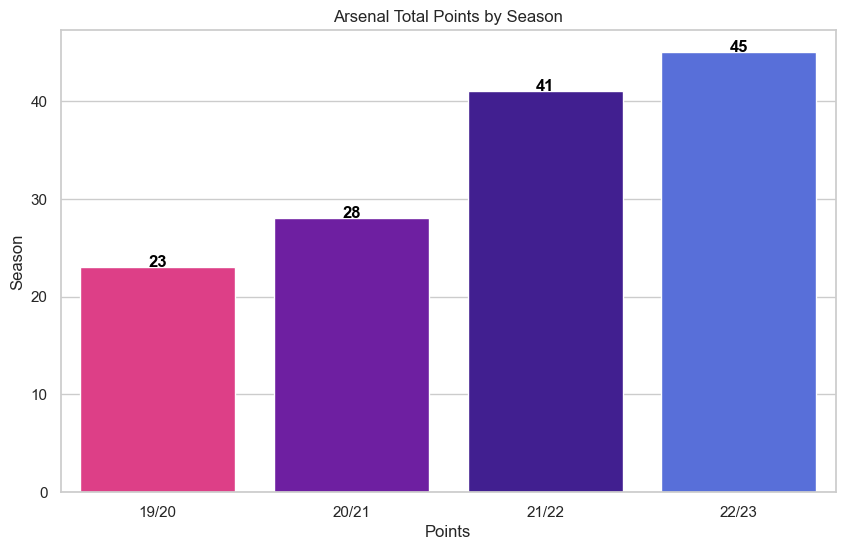

In [71]:
#Bar graph showing points totals each year
# Data
average_points = [data_arsenal_matches_19_20['Points'].sum(), data_arsenal_matches_20_21['Points'].sum(), data_arsenal_matches_21_22['Points'].sum(), data_arsenal_home_22_23['Points'].sum()]
years = ['19/20', '20/21', '21/22', '22/23']

# Set up the graph
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE"]
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x=years, y=average_points, ax=ax, palette=palette)

#add labels to each bar
for i, v in enumerate(average_points):
    ax.text(i, v + 0.5, f'{v:.0f}', ha='center', va='center', fontweight='bold', color='black')

ax.set_title("Arsenal Total Points by Season")
ax.set_xlabel("Points")
ax.set_ylabel("Season")

#### Relationship Between Performance and Results
A. Graph 2: Correlation of home points and goals scored
- Scatter plot with trendline

B. Graph 3: Correlation of home points and goals conceded
- Another scatter plot

A scatter plot showing the correlation between the number of points collected at home and other on-pitch performance factors, such as goals scored or conceded.
